Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                    Country              City  AQI Value  \
0        Russian Federation        Praskoveya         51   
1                    Brazil  Presidente Dutra         41   
2                     Italy   Priolo Gargallo         66   
3                    Poland         Przasnysz         34   
4                    France          Punaauia         22   
5  United States of America       Punta Gorda         54   
6                   Germany        Puttlingen         62   
7                   Belgium             Puurs         64   
8        Russian Federation        Pyatigorsk         54   
9                     Egypt            Qalyub        142   

                     AQI Category  CO AQI Value CO AQI Category  \
0                        Moderate             1            Good   
1                            Good             1            Good   
2        

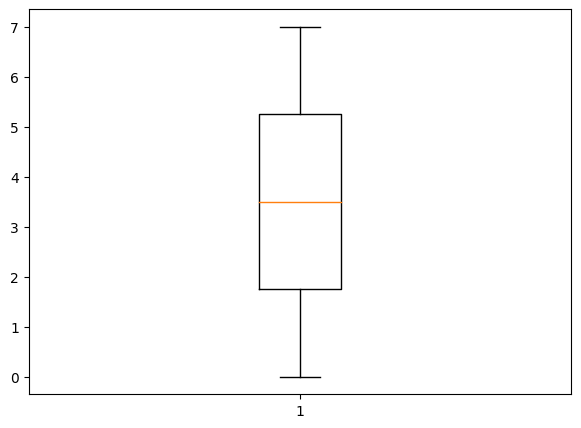

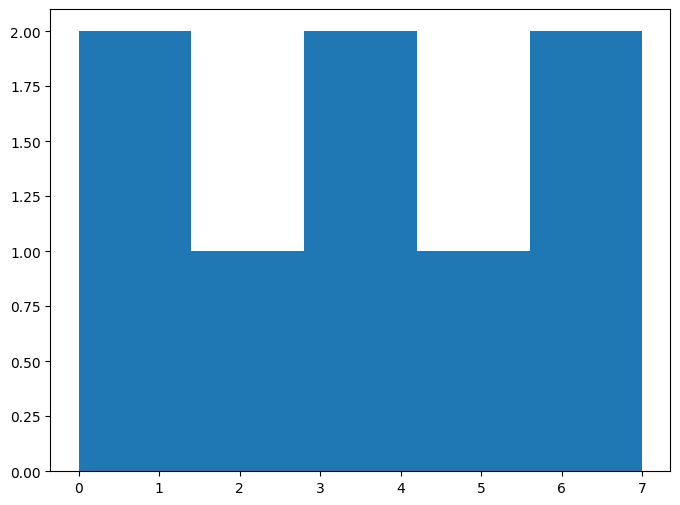

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


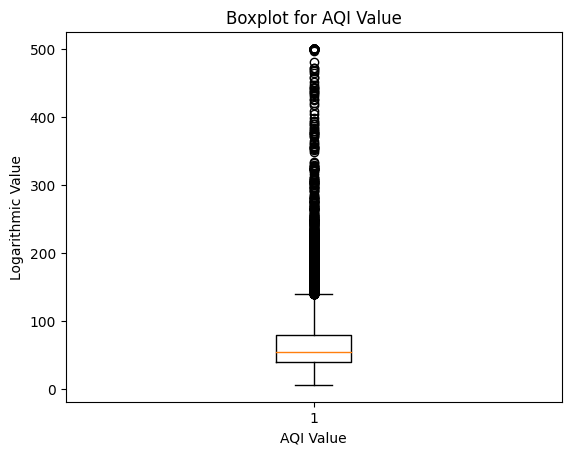

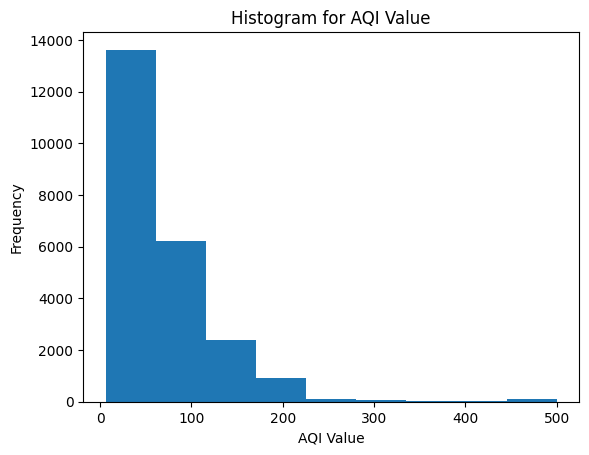

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


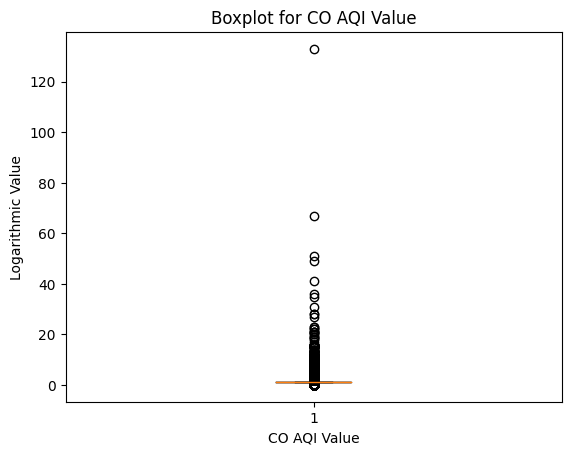

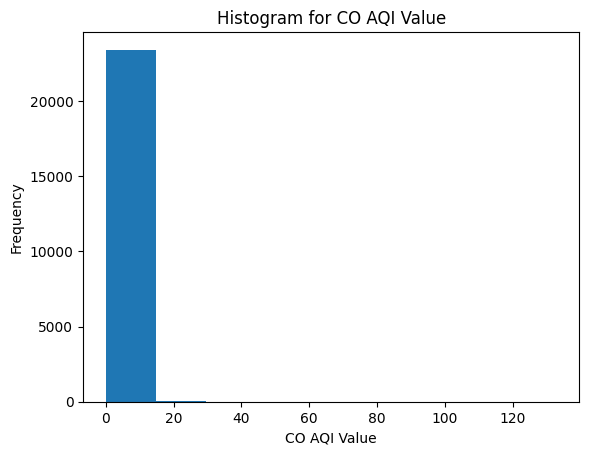

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


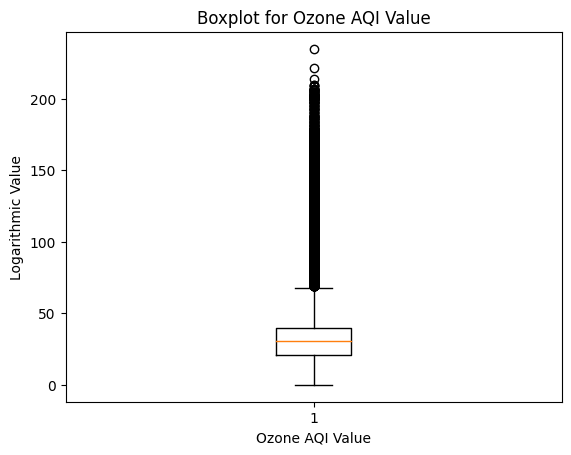

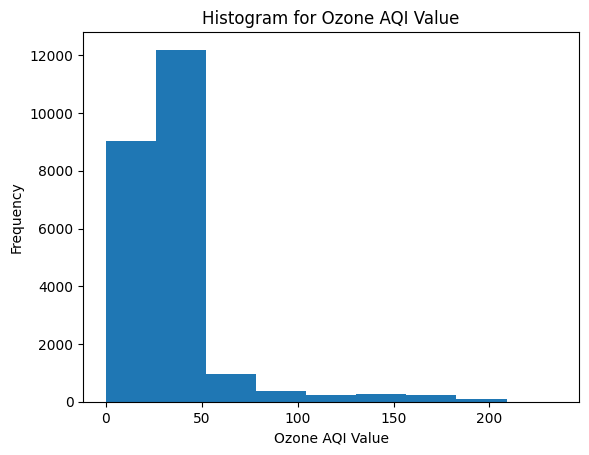

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


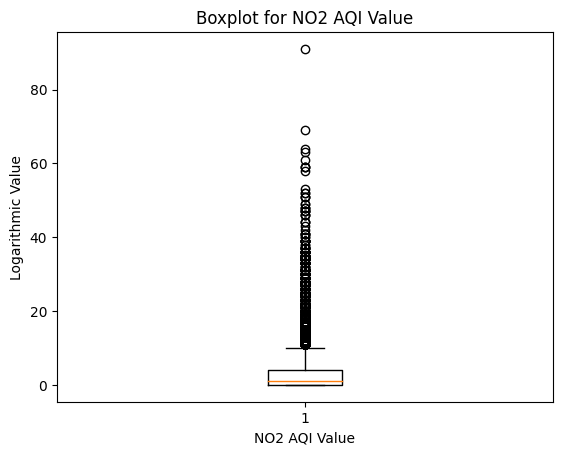

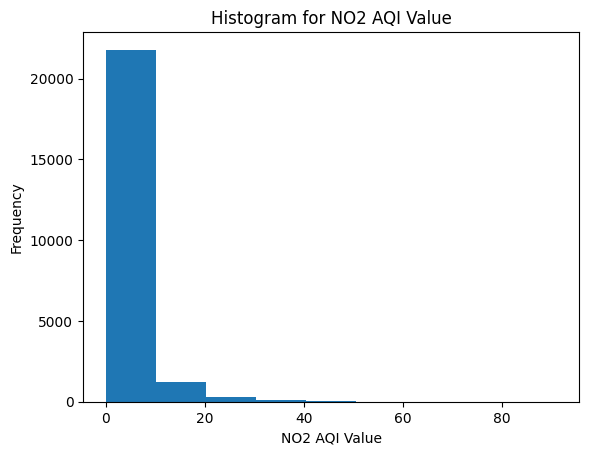

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


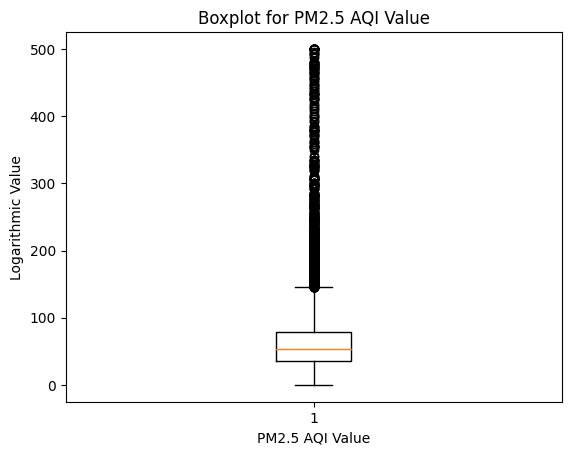

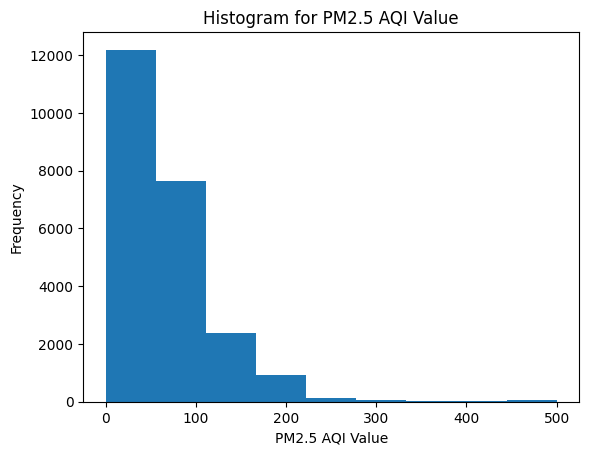

X_train_combined:
     0    1    2  x0_4  x0_7  x1_5  x1_8  x2_6  x2_9
0 -1.0 -1.0 -1.0   1.0   0.0   1.0   0.0   1.0   0.0
1  1.0  1.0  1.0   0.0   1.0   0.0   1.0   0.0   1.0

X_test_combined:
     0    1    2  x0_4  x0_7  x1_5  x1_8  x2_6  x2_9
0 -3.0 -3.0 -3.0   0.0   0.0   0.0   0.0   0.0   0.0


In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/My Drive/Airpollution.csv'  # Путь к файлу на Google Drive
df = pd.read_csv(file_path)
print(df.head(10))
print(df.info())
print(df.dtypes)
print(df.shape)
print(df.columns)
print(df.isna().sum())
df.drop_duplicates(inplace=True)
print(df.dtypes.value_counts())
print(df.isna().any())

data = [0,1, 2, 3, 4, 5, 6, 7]

fig, ax = plt.subplots(figsize=(7, 5))
ax.boxplot(data)

plt.show()
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(data, bins=5)

plt.show()

df = pd.read_csv('/content/drive/My Drive/Airpollution.csv')
numerical_data = df.select_dtypes(include=['int64', 'float64'])
transformed_data = numerical_data.apply(lambda x: np.log(x))
for column, values in numerical_data.items():
    log_values = np.log(values)  # Логарифмирование значений

    # Диаграмма размаха
    plt.figure()
    plt.boxplot(values)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Logarithmic Value')
    plt.show()

    # Гистограмма
    plt.figure()
    plt.hist(values, bins=9)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Удаление столбца "City" из датасета
df.drop('City', axis=1, inplace=True)

# Выделение столбца "AQI Value" как ключевого
df = df.set_index('AQI Value')


# Определите значения признаков 'X' и целевых переменных 'y'

X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([1, 2, 3])

# Разделите данные на обучающую и тестовую выборки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Скеллинг данных для X_train и X_test выборок
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение OHE для X_train и X_test выборок
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)


# Преобразование разреженных матриц в DataFrame
X_train_encoded = pd.DataFrame.sparse.from_spmatrix(X_train_encoded, columns=encoder.get_feature_names_out())
X_test_encoded = pd.DataFrame.sparse.from_spmatrix(X_test_encoded, columns=encoder.get_feature_names_out())

# Объединение датафреймов
X_train_combined = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_train_encoded)], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_scaled), pd.DataFrame(X_test_encoded)], axis=1)

# Вывод данных на экран
print("X_train_combined:")
print(X_train_combined)
print()
print("X_test_combined:")
print(X_test_combined)





